In [55]:
import tensorflow as tf

# Import the MNIST dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale/normalise the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

This is a simple feed-forward neural network that I am trying to build.
Since the input is an image in 28x28 format, we need to flatten it prior to passing it through the hidden layers. There are 2 hidden layers and I have chosen 128 as the number of neurons for both of them and relu as the activation function. The output layer has 10 outputs (since we expect a repsonse between 0-9). Activation function is Softmax so that we can get a probability distribution for each of the possible 10 outputs.

In [56]:
# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Create the optimizer and the loss function
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
# Train the data
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 14s 227us/sample - loss: 0.2641 - accuracy: 0.9222
Epoch 2/3
60000/60000 [==============================] - 12s 207us/sample - loss: 0.1083 - accuracy: 0.9666
Epoch 3/3
60000/60000 [==============================] - 13s 212us/sample - loss: 0.0743 - accuracy: 0.9775


In [68]:
# Validation loss
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {round(val_acc*100, 2)}%")

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Validation Loss: 0.09583288898961619
Validation Accuracy: 97.01%


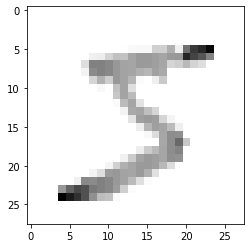

In [69]:
# Print a sample of the training set
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [60]:
# Save the model
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [61]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [62]:
# Predictions
predictions = new_model.predict([x_test])

The predictions are in the form of probability distributions. In order to get the output with the highest probability, we can pass it through an argmax using numpy (there are other ways to do it too)

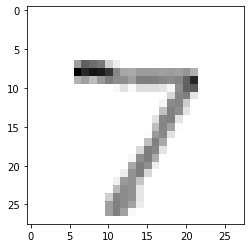

Predicted Output : 7


In [63]:
# Import numpy
import numpy as np

# Print out value in the test dataset with index=0 (as a sample) 
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

# Print the output of the argmax function for the index value = 0 in the test dataset
print(f"Predicted Output : {np.argmax(predictions[0])}")